In [1]:
import pandas as pd

In [2]:
result_001 = pd.read_csv('run_results/result_001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.csv')

In [6]:
result_001.columns

Index(['trainer_name', 'now', 'return_epoch', 'hidden_size', 'train_loss',
       'val_loss', 'avg_train_anomaly_score', 'std_train_anomaly_score',
       'avg_val_anomaly_score', 'std_val_anomaly_score',
       'avg_test_anomaly_score', 'std_test_anomaly_score',
       'avg_true_anomaly_score', 'std_true_anomaly_score', 'accuracy',
       'precision', 'recall', 'f1_score', 'roc_auc', 'threshold', 'config'],
      dtype='object')

In [14]:
result_001.shape

(84, 21)

In [16]:
result_001.sort_values(['f1_score','roc_auc'], ascending=False)

,trainer_name,now,return_epoch,hidden_size,train_loss,val_loss,avg_train_anomaly_score,std_train_anomaly_score,avg_val_anomaly_score,std_val_anomaly_score,...,std_test_anomaly_score,avg_true_anomaly_score,std_true_anomaly_score,accuracy,precision,recall,f1_score,roc_auc,threshold,config
27,NewTrainer,2021-12-28 00:06:36.000418,13,2,0.7134,0.6461,0.4832,0.3641,0.4832,0.3641,...,0.3641,0.8174,0.6511,0.9833,0.4859,0.1865,0.2695,0.6585,1.5754,"Namespace(batch_size=256, data_name='001_UCR_A..."
26,NewTrainer,2021-12-28 00:06:36.000418,13,2,0.7134,0.6461,0.4832,0.3641,0.4832,0.3641,...,0.3641,0.8174,0.6511,0.9801,0.3404,0.2176,0.2655,0.6585,1.3934,"Namespace(batch_size=256, data_name='001_UCR_A..."
83,NewTrainer,2021-12-28 00:10:01.696505,21,8,0.4470,0.3617,0.3101,0.2343,0.3101,0.2343,...,0.2343,0.8565,0.8915,0.9671,0.1924,0.3095,0.2373,0.6578,1.0131,"Namespace(batch_size=256, data_name='001_UCR_A..."
34,NewTrainer,2021-12-28 00:06:58.471837,34,2,0.4278,0.3705,0.3072,0.2273,0.3072,0.2273,...,0.2273,0.8097,0.8213,0.9630,0.1656,0.3054,0.2147,0.6607,0.9890,"Namespace(batch_size=256, data_name='001_UCR_A..."
62,NewTrainer,2021-12-28 00:09:03.679468,56,4,0.4164,0.3458,0.3000,0.2079,0.3000,0.2079,...,0.2079,0.8062,0.8243,0.9610,0.1609,0.3216,0.2145,0.6472,0.9237,"Namespace(batch_size=256, data_name='001_UCR_A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,NewTrainer,2021-12-28 00:06:58.471837,34,2,0.4278,0.3705,0.3072,0.2273,0.3072,0.2273,...,0.2273,0.8097,0.8213,0.6134,0.0232,0.5432,0.0444,0.6607,0.3072,"Namespace(batch_size=256, data_name='001_UCR_A..."
14,BaseTrainer,2021-12-28 00:04:02.121597,56,8,0.3698,0.3292,0.2710,0.1948,0.2710,0.1948,...,0.1948,0.7684,0.8017,0.6017,0.0230,0.5568,0.0442,0.6529,0.2710,"Namespace(batch_size=256, data_name='001_UCR_A..."
70,NewTrainer,2021-12-28 00:09:47.457466,19,8,0.4504,0.3675,0.3135,0.2329,0.3135,0.2329,...,0.2329,0.7002,0.6480,0.6128,0.0231,0.5419,0.0442,0.6513,0.3135,"Namespace(batch_size=256, data_name='001_UCR_A..."
56,NewTrainer,2021-12-28 00:09:03.679468,56,4,0.4164,0.3458,0.3000,0.2079,0.3000,0.2079,...,0.2079,0.8062,0.8243,0.6082,0.0226,0.5378,0.0434,0.6472,0.3000,"Namespace(batch_size=256, data_name='001_UCR_A..."


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
result_001.columns

Index(['trainer_name', 'now', 'return_epoch', 'hidden_size', 'train_loss',
       'val_loss', 'avg_train_anomaly_score', 'std_train_anomaly_score',
       'avg_val_anomaly_score', 'std_val_anomaly_score',
       'avg_test_anomaly_score', 'std_test_anomaly_score',
       'avg_true_anomaly_score', 'std_true_anomaly_score', 'accuracy',
       'precision', 'recall', 'f1_score', 'roc_auc', 'threshold', 'config'],
      dtype='object')

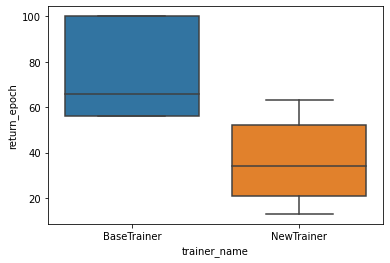

In [29]:
sns.boxplot(data=result_001, y='return_epoch', x='trainer_name')

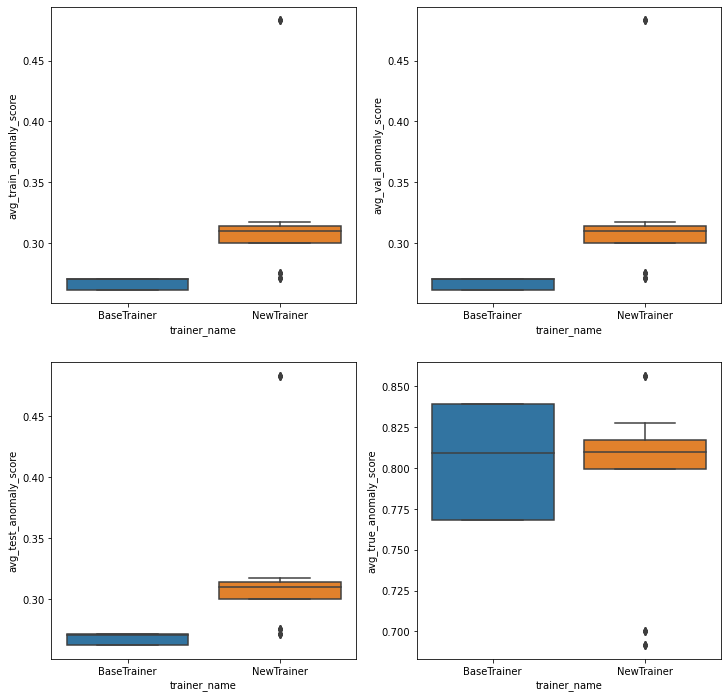

In [27]:
plt.figure(figsize=(12,12))

plt.subplot(221)
sns.boxplot(data=result_001, y='avg_train_anomaly_score', x='trainer_name')
plt.subplot(222)
sns.boxplot(data=result_001, y='avg_val_anomaly_score', x='trainer_name')
plt.subplot(223)
sns.boxplot(data=result_001, y='avg_test_anomaly_score', x='trainer_name')
plt.subplot(224)
sns.boxplot(data=result_001, y='avg_true_anomaly_score', x='trainer_name')

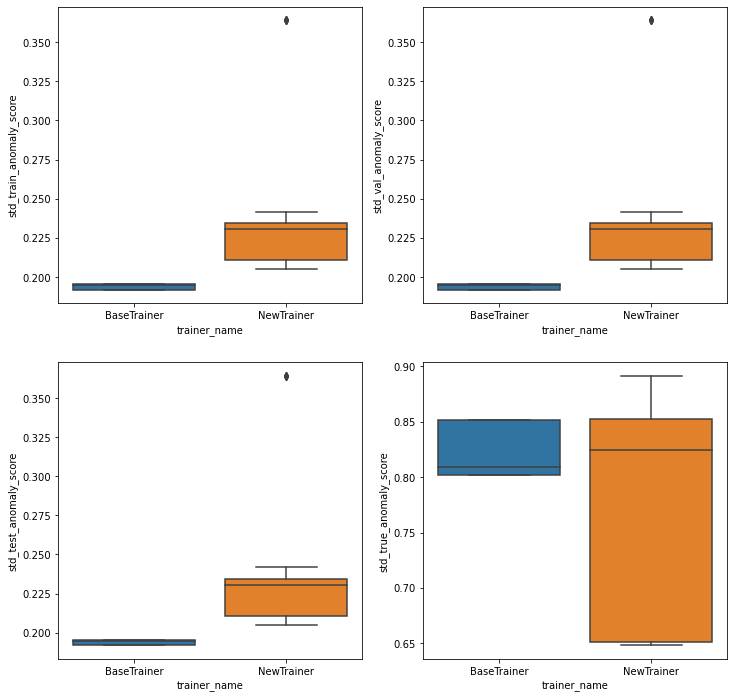

In [28]:
plt.figure(figsize=(12,12))

plt.subplot(221)
sns.boxplot(data=result_001, y='std_train_anomaly_score', x='trainer_name')
plt.subplot(222)
sns.boxplot(data=result_001, y='std_val_anomaly_score', x='trainer_name')
plt.subplot(223)
sns.boxplot(data=result_001, y='std_test_anomaly_score', x='trainer_name')
plt.subplot(224)
sns.boxplot(data=result_001, y='std_true_anomaly_score', x='trainer_name')

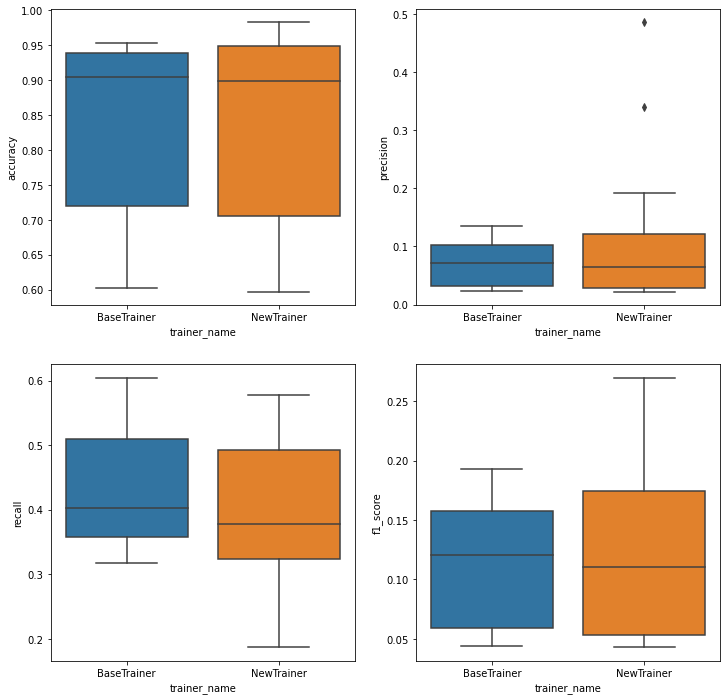

In [31]:
plt.figure(figsize=(12,12))

plt.subplot(221)
sns.boxplot(data=result_001, y='accuracy', x='trainer_name')
plt.subplot(222)
sns.boxplot(data=result_001, y='precision', x='trainer_name')
plt.subplot(223)
sns.boxplot(data=result_001, y='recall', x='trainer_name')
plt.subplot(224)
sns.boxplot(data=result_001, y='f1_score', x='trainer_name')

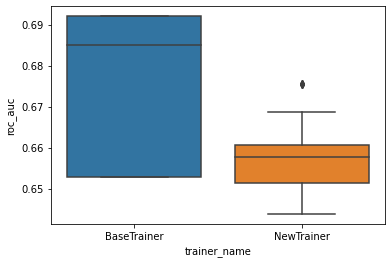

In [32]:
sns.boxplot(data=result_001, y='roc_auc', x='trainer_name')